[[1. 0.]
 [0. 1.]]


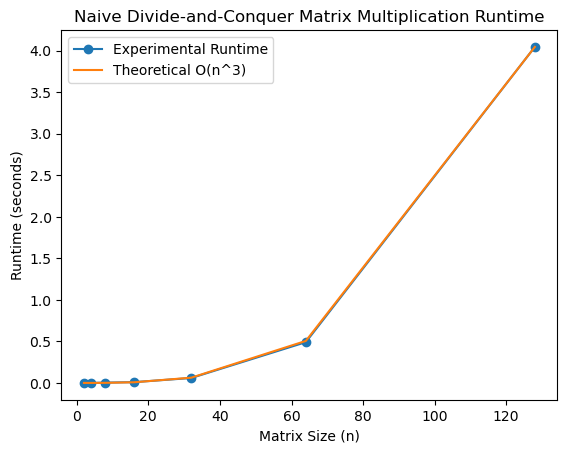

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt

def matrix_multiply_naive(A, B):
    n = A.shape[0]
    if n == 1:
        return A * B
    
    # Divide matrices into submatrices
    mid = n // 2
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]
    
    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]
    
    # Recursive multiplications
    C11 = matrix_multiply_naive(A11, B11) + matrix_multiply_naive(A12, B21)
    C12 = matrix_multiply_naive(A11, B12) + matrix_multiply_naive(A12, B22)
    C21 = matrix_multiply_naive(A21, B11) + matrix_multiply_naive(A22, B21)
    C22 = matrix_multiply_naive(A21, B12) + matrix_multiply_naive(A22, B22)
    
    # Combine submatrices into result
    C = np.zeros((n, n))
    C[:mid, :mid] = C11
    C[:mid, mid:] = C12
    C[mid:, :mid] = C21
    C[mid:, mid:] = C22
    
    return C

print(matrix_multiply_naive(np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])))

def measure_runtime(n_values):
    runtimes = []
    for n in n_values:
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)
        
        start_time = time.time()
        matrix_multiply_naive(A, B)
        end_time = time.time()
        
        runtimes.append(end_time - start_time)
    return runtimes

# Define values of n to test
n_values = [2**i for i in range(1, 8)]
runtimes = measure_runtime(n_values)

# Plot runtime vs n
plt.plot(n_values, runtimes, marker='o', label='Experimental Runtime')
plt.plot(n_values, [n**3*(runtimes[-1]/n_values[-1]**3) for n in n_values], label='Theoretical O(n^3)')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Runtime (seconds)')
plt.title('Naive Divide-and-Conquer Matrix Multiplication Runtime')
plt.legend()
plt.show()

In [3]:
import numpy as np

def strassen_multiply(A, B):
    # Base case: if the matrices are 1x1, perform simple multiplication
    if len(A) == 1:
        return A * B

    # Split matrices into quadrants
    n = len(A)
    half = n // 2

    A11 = A[:half, :half]
    A12 = A[:half, half:]
    A21 = A[half:, :half]
    A22 = A[half:, half:]

    B11 = B[:half, :half]
    B12 = B[:half, half:]
    B21 = B[half:, :half]
    B22 = B[half:, half:]

    # Compute intermediate matrices M1 to M7
    M1 = strassen_multiply(A11 + A22, B11 + B22)
    M2 = strassen_multiply(A21 + A22, B11)
    M3 = strassen_multiply(A11, B12 - B22)
    M4 = strassen_multiply(A22, B21 - B11)
    M5 = strassen_multiply(A11 + A12, B22)
    M6 = strassen_multiply(A21 - A11, B11 + B12)
    M7 = strassen_multiply(A12 - A22, B21 + B22)

    # Compute the submatrices of C
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    # Combine the submatrices into the result matrix C
    C = np.zeros((n, n))
    C[:half, :half] = C11
    C[:half, half:] = C12
    C[half:, :half] = C21
    C[half:, half:] = C22

    return C

# Example usage
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

C = strassen_multiply(A, B)
print(C)

[[19. 22.]
 [43. 50.]]


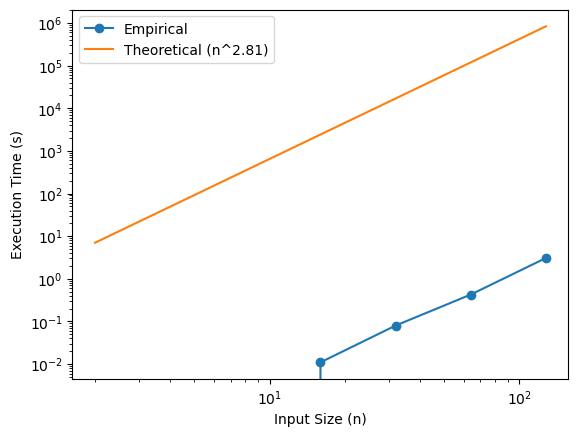

In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np


def measure_time(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    start_time = time.time()
    strassen_multiply(A, B)
    return time.time() - start_time

# Input sizes
sizes = [2**i for i in range(1, 8)]
times = [measure_time(n) for n in sizes]

# Plotting
plt.loglog(sizes, times, marker='o', label='Empirical')
plt.loglog(sizes, [n**2.81 for n in sizes], label='Theoretical (n^2.81)')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.show()